In [1]:
using DifferentialEquations
using LinearAlgebra
using Plots
using FileIO, JLD2

In [3]:
include("Solvers.jl")
include("PlotFunctions.jl")
include("UsefulFunctions.jl")
include("PointGenerators.jl")

PointsOnSphere (generic function with 2 methods)

In [7]:
D = Dict()
D["RK4"] = 0.1
D["RK4"]

0.1

In [69]:
Mest = FileIO.load(raw"Variables\SolutionMatrices\RK4\640.jld2", "M")
Mtrue = FileIO.load(raw"Variables\SolutionMatrices\RadauIIA5\10000.jld2", "M")
C = CorrelationMatrix(Mest,Mtrue,1331,601)
Cavg = sum(C,dims=1)/1331
;

In [68]:
for i = eachindex(Cavg)
    if Cavg[i] < 1
        print(i*0.1 , " ")
        break
    end
end

6.6000000000000005 

In [120]:
t = 9
i = Integer(floor(t/0.1))+1
v = ones(1,i)'-Cavg[1:i]
min = maximum(v)
idx = argmax(v)[1]*0.1
print(min, " ", idx)


1.113775738303957e-12 7.300000000000001

d = f(dt, t)

In [147]:
t = 20
n = Integer(floor(t/0.1))+1
v = []
Mtrue = FileIO.load(raw"Variables\SolutionMatrices\RadauIIA5\10000.jld2", "M")
for solver = [RK4]
    for k = [10 20 40 80 160 320 640]
        str = string("Variables", "\\", "SolutionMatrices", "\\", solver, "\\", k, ".jld2")
        Mest = FileIO.load(str, "M")
        C = CorrelationMatrix(Mest,Mtrue,1331,601)
        Cavg = sum(C,dims=1)/1331
        push!(v,1-minimum(Cavg[1:n]))
    end
end


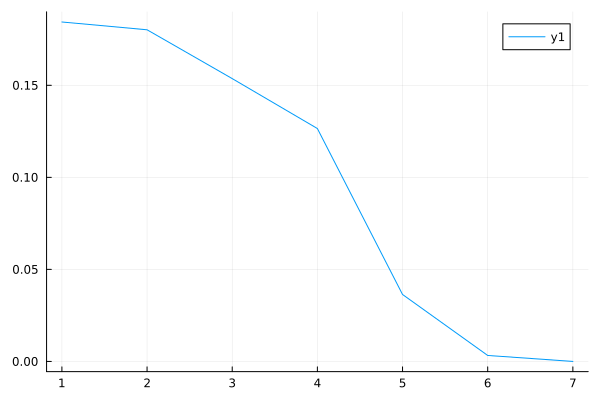

In [158]:
plot(v)